<a href="https://colab.research.google.com/github/xiaomeng-ma/Dissertation/blob/main/Experiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, Sequential, Model, Input, optimizers
!pip install git+https://github.com/huggingface/transformers
from transformers import AutoTokenizer
from transformers import AutoModel
from torch.utils.data import DataLoader
from transformers import AutoModelForSequenceClassification, AdamW
import torch
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

import numpy as np
import pandas as pd
from pandas import DataFrame
import itertools
import string
import os
import nltk

from sklearn.model_selection import train_test_split, StratifiedKFold

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from google.colab import drive 
drive.mount('/content/drive')

In [ ]:
file_path = '/content/drive/My Drive/Dissertation/Experiment 1'

#Import Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/xiaomeng-ma/Dissertation/main/Experiment%201/Data/english-train-high.txt', sep = '\t', names =['root','inflection','tag'])
df

In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/xiaomeng-ma/Dissertation/main/Experiment%201/Data/english-uncovered-test.txt', sep = '\t', names = ['root', 'inflection','tag'])

In [ ]:
df.groupby("tag").count()

,root,inflection
tag,,
V;3;SG;PRS,2025,2025
V;NFIN,2008,2008
V;PST,2016,2016
V;V.PTCP;PRS,1959,1959
V;V.PTCP;PST,1992,1992


In [ ]:
df_test.groupby("tag").count()

,root,inflection
tag,,
V;3;SG;PRS,210,210
V;NFIN,175,175
V;PST,222,222
V;V.PTCP;PRS,202,202
V;V.PTCP;PST,191,191


In [ ]:
def label_race (row):
  if row['tag'] == 'V;PST' :
    if row['inflection'] == row['root'] + 'ed':
      return 'Regular'
    else:
      return 'Irregular' 
  if row['tag'] == 'V;NFIN':
      return 'Regular'
  if row['tag'] == 'V;3;SG;PRS' :
    if row['inflection'] == row['root'] + 's':
      return 'Regular'
    else: 
      return 'Irregular'
  if row['tag'] == 'V;V.PTCP;PST':
    if row['inflection'] == row['root'] + 'ed':
      return 'Regular'
    else:
      return 'Irregular'
  if row['tag']  == "V;V.PTCP;PRS":
    if row['inflection'] == row['root'] + 'ing':
      return 'Regular'
    else:
      return 'Irregular'
df['reg'] = df.apply (lambda row: label_race(row), axis=1)
df_test['reg'] = df_test.apply(lambda row: label_race(row), axis=1)


In [ ]:
dfu = df.groupby(['tag']).reg.value_counts().unstack()
dfu

reg,Irregular,Regular
tag,,
V;3;SG;PRS,183.0,1842.0
V;NFIN,NaN,2008.0
V;PST,1199.0,817.0
V;V.PTCP;PRS,1010.0,949.0
V;V.PTCP;PST,1204.0,788.0


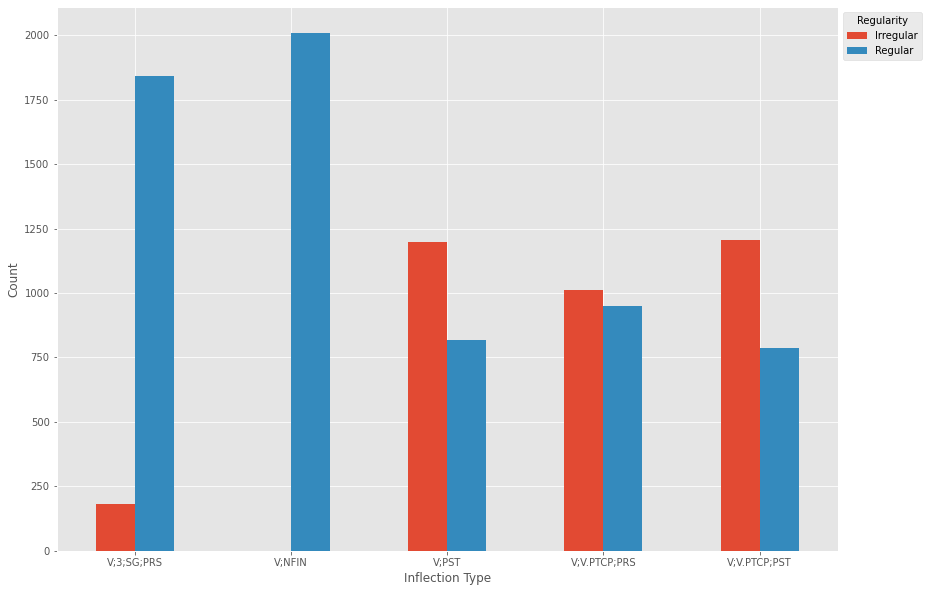

In [ ]:
ax = dfu.plot(kind='bar', figsize=(14, 10), xlabel='Inflection Type', ylabel='Count', rot=0)
ax.legend(title='Regularity', bbox_to_anchor=(1, 1), loc='upper left')

In [ ]:
dfu_test = df_test.groupby(['tag']).reg.value_counts().unstack()
dfu_test

reg,Irregular,Regular
tag,,
V;3;SG;PRS,25.0,185.0
V;NFIN,NaN,175.0
V;PST,118.0,104.0
V;V.PTCP;PRS,101.0,101.0
V;V.PTCP;PST,109.0,82.0


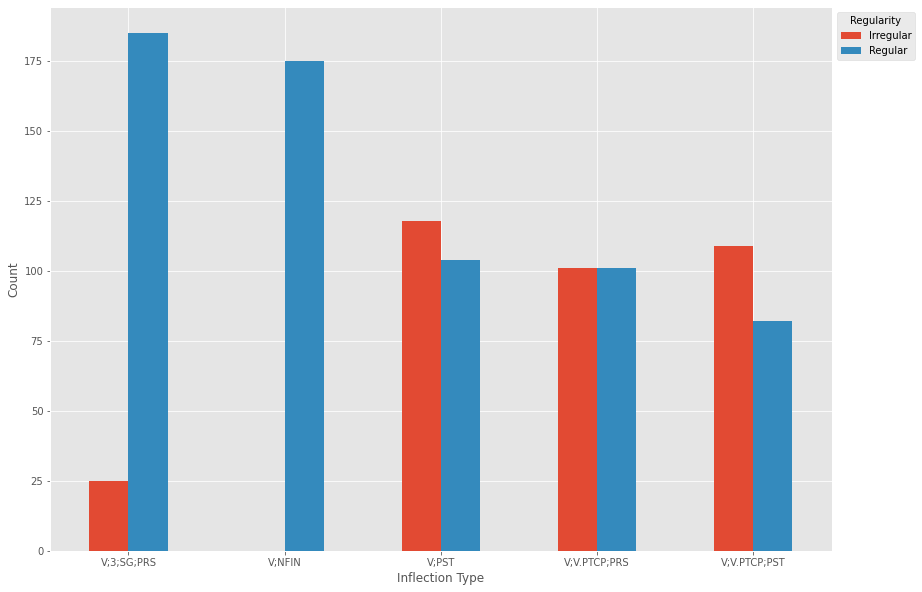

In [ ]:
ax = dfu_test.plot(kind='bar', figsize=(14, 10), xlabel='Inflection Type', ylabel='Count', rot=0)
ax.legend(title='Regularity', bbox_to_anchor=(1, 1), loc='upper left')

In [ ]:
df_ed = df[df['tag']=='V;PST']
df_ing = df[df['tag']=='V;V.PTCP;PRS']
df_en = df[df['tag']=='V;V.PTCP;PST']
df_s = df[df['tag']=='V;3;SG;PRS']
df_ed_test = df_test[df_test['tag'] == 'V;PST']
df_ing_test = df_test[df_test['tag'] == 'V;V.PTCP;PRS']
df_en_test = df_test[df_test['tag']=='V;V.PTCP;PST']
df_s_test = df_test[df_test['tag']=='V;3;SG;PRS']
df_fin = df[df['tag'] == 'V;NFIN']
df_fin_test = df_test[df_test['tag'] == 'V;NFIN']

In [ ]:
df_ing.to_csv('Progressive_train_data.csv')
!cp Progressive_train_data.csv '/content/drive/My Drive/Dissertation/Experiment 1/Input_csv'
df_en.to_csv('Past_Participle_train_data.csv')
!cp Past_Participle_train_data.csv '/content/drive/My Drive/Dissertation/Experiment 1/Input_csv'
df_s.to_csv('3sg_train_data.csv')
!cp '3sg_train_data.csv' '/content/drive/My Drive/Dissertation/Experiment 1/Input_csv'
df_ed.to_csv('Past_Tense_train_data.csv')
!cp Past_Tense_train_data.csv '/content/drive/My Drive/Dissertation/Experiment 1/Input_csv'

In [ ]:
df_ing_test.to_csv('Progressive_test_data.csv')
!cp Progressive_test_data.csv '/content/drive/My Drive/Dissertation/Experiment 1/Input_csv'
df_en_test.to_csv('Past_Participle_test_data.csv')
!cp Past_Participle_test_data.csv '/content/drive/My Drive/Dissertation/Experiment 1/Input_csv'
df_s_test.to_csv('3sg_test_data.csv')
!cp '3sg_test_data.csv' '/content/drive/My Drive/Dissertation/Experiment 1/Input_csv'
df_ed_test.to_csv('Past_Tense_test_data.csv')
!cp Past_Tense_test_data.csv '/content/drive/My Drive/Dissertation/Experiment 1/Input_csv'

#Vectorization and Preparing All Data

In [ ]:
df['tag'] = df['tag'].astype('category')
df['tag_cat'] = df['tag'].cat.codes
df_test['tag'] = df_test['tag'].astype('category')
df_test['tag_cat'] = df_test['tag'].cat.codes

In [ ]:
df.tail()

,root,inflection,tag,reg,tag_cat,input_tag
9995,disordain,disordain,V;NFIN,Regular,1,disordain1
9996,overintellectualise,overintellectualising,V;V.PTCP;PRS,Irregular,3,overintellectualise3
9997,warchalk,warchalking,V;V.PTCP;PRS,Regular,3,warchalk3
9998,oblique,obliqued,V;V.PTCP;PST,Irregular,4,oblique4
9999,lawe,lawes,V;3;SG;PRS,Regular,0,lawe0


In [ ]:
def input_tag(row):
  it = row['root'] + str(row['tag_cat'])
  return it
df['input_tag'] = df.apply (lambda row: input_tag(row), axis=1)
df_test['input_tag'] = df_test.apply (lambda row: input_tag(row),axis=1)

In [ ]:
root = df['input_tag'].values
inf = df['inflection'].values
inf = ['<' + i + '>' for i in inf]
root_test = df_test['input_tag'].values
inf_test = df_test['inflection'].values
inf_test = ['<' + i + '>' for i in inf_test]

In [ ]:
from keras_preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tk = Tokenizer(num_words = None, char_level = True,oov_token = 'UNK')
tk.fit_on_texts(inf)
alphabet="abcdefghijklmnopqrstuvwxyz0123456789-,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1

In [ ]:
tk.word_index = char_dict
tk.word_index[tk.oov_token]=max(char_dict.values()) + 1
root_seq = tk.texts_to_sequences(root)
inf_seq = tk.texts_to_sequences(inf)
print(root[0], inf[0])
print(root_seq[0], inf_seq[0])

malinvest1 <malinvest>
[13, 1, 12, 9, 14, 22, 5, 19, 20, 28] [62, 13, 1, 12, 9, 14, 22, 5, 19, 20, 63]


In [ ]:
root_seq_test = tk.texts_to_sequences(root_test)
inf_seq_test = tk.texts_to_sequences(inf_test)
print(root_test[0], inf_test[0])
print(root_seq_test[0], inf_seq_test[0])

enwind2 <enwound>
[5, 14, 23, 9, 14, 4, 29] [62, 5, 14, 23, 15, 21, 14, 4, 63]


In [ ]:
print('Max length root:', max([len(i) for i in root_seq]))
print('Max length inflection:', max([len(i) for i in inf_seq]))

Max length root: 20
Max length inflection: 23


In [ ]:
input_root = pad_sequences(root_seq, maxlen = 25, padding = 'post')
output_inf = pad_sequences(inf_seq, maxlen = 26, padding = 'post')
train_input_root, val_input_root, train_output_inf, val_output_inf = train_test_split(input_root, output_inf, test_size = 0.15, random_state = 42)
print('Train Input shape:', train_input_root.shape, 'Train Output shape:', train_output_inf.shape)
print('Val Input shape:', val_input_root.shape, 'Val Output shape:', val_output_inf.shape)


Train Input shape: (8500, 25) Train Output shape: (8500, 26)
Val Input shape: (1500, 25) Val Output shape: (1500, 26)


In [ ]:
dfu_train.fillna(0)

reg,Irregular,Regular
tag,,
V;3;SG;PRS,151.0,1564.0
V;NFIN,0.0,1716.0
V;PST,1002.0,693.0
V;V.PTCP;PRS,852.0,828.0
V;V.PTCP;PST,1023.0,671.0


In [ ]:
train_r, val_r = train_test_split(root, test_size = 0.15, random_state = 42)
df_train = df[df['input_tag'].isin(train_r)]
df_val =df[df['input_tag'].isin(val_r)]
dfu_train = df_train.groupby(['tag']).reg.value_counts().unstack()
dfu_train = dfu_train.fillna(0)
def train_per(tag):
  irr = dfu_train['Irregular'][tag]
  reg = dfu_train['Regular'][tag]
  total = irr + reg
  irr_per = irr/total
  reg_per = reg/total
  return [tag, reg, irr, "{:.2%}".format(reg_per), "{:.2%}".format(irr_per)]
train_per_list = [train_per('V;PST'), train_per('V;V.PTCP;PST'), train_per('V;V.PTCP;PRS'), train_per('V;NFIN'), train_per('V;3;SG;PRS')]
df_train_per = pd.DataFrame(train_per_list, columns = ['Type', 'Train Regular', 'Train Irregular', 'Train Regular%', 'Train Irregular%'])

In [ ]:
df_train_per

,Type,Train Regular,Train Irregular,Train Regular%,Train Irregular%
0,V;PST,693.0,1002.0,40.88%,59.12%
1,V;V.PTCP;PST,671.0,1023.0,39.61%,60.39%
2,V;V.PTCP;PRS,828.0,852.0,49.29%,50.71%
3,V;NFIN,1716.0,0.0,100.00%,0.00%
4,V;3;SG;PRS,1564.0,151.0,91.20%,8.80%


In [ ]:
input_root_test = pad_sequences(root_seq_test, maxlen = 20, padding = 'post')
output_inf_test = pad_sequences(inf_seq_test, maxlen = 21, padding = 'post')
print('Input shape:', input_root_test.shape, 'Output shape:', output_inf_test.shape)

Input shape: (1000, 20) Output shape: (1000, 21)


In [ ]:
batch_size = 32
def format_dataset(root, inf):
  return ({"encoder_inputs": root, "decoder_inputs": inf[:,:-1]}, inf[:, 1:])
def make_dataset(root, inf):
  dataset = tf.data.Dataset.from_tensor_slices((root, inf))
  dataset = dataset.batch(batch_size)
  dataset = dataset.map(format_dataset)
  return dataset.prefetch(16).cache()

In [ ]:
train_ds = make_dataset(train_input_root, train_output_inf)
for inputs, targets in train_ds.take(1):
  print("train inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("train targets.shape:", targets.shape) 

train inputs encoder, decoder shape: (32, 25) (32, 25)
train targets.shape: (32, 25)


In [ ]:
val_ds = make_dataset(val_input_root, val_output_inf)
for inputs, targets in val_ds.take(1):
  print("train inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("train targets.shape:", targets.shape) 

train inputs encoder, decoder shape: (32, 25) (32, 25)
train targets.shape: (32, 25)


In [ ]:
test_ds = make_dataset(input_root_test, output_inf_test)
for inputs, targets in test_ds.take(1):
  print("test inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("test targets.shape:", targets.shape)

test inputs encoder, decoder shape: (32, 20) (32, 20)
test targets.shape: (32, 20)


#V and P only past tense


In [ ]:
df_ed_train = df_train[df_train['tag'] == 'V;PST']
df_ed_val = df_val[df_val['tag']=='V;PST']

In [ ]:
def raw_word(train, val, test):
  root_train = train['root'].values
  inf_train = train['inflection'].values
  inf_train = ['<' + i + '>' for i in inf_train]
  root_val = val['root'].values
  inf_val = val['inflection'].values
  inf_val= ['<' + i + '>' for i in inf_val]
  root_test = test['root'].values
  inf_test = test['inflection'].values
  inf_test = ['<' + i + '>' for i in inf_test]
  return root_train, inf_train, root_val, inf_val, root_test, inf_test
root_train, inf_train, root_val, inf_val, root_test, inf_test =  raw_word(df_ed_train, df_ed_val, df_ed_test)

In [ ]:
tk.word_index = char_dict
tk.word_index[tk.oov_token]=max(char_dict.values()) + 1
root_seq_train = tk.texts_to_sequences(root_train)
inf_seq_train = tk.texts_to_sequences(inf_train)
root_seq_val = tk.texts_to_sequences(root_val)
inf_seq_val = tk.texts_to_sequences(inf_val)
print('train_word:', root_train[0], inf_train[0])
print('train_seq:',root_seq_train[0], inf_seq_train[0])
print('val_word:',root_val[0], inf_val[0])
print('val_seq:',root_seq_val[0], inf_seq_val[0])
print('test_word:',root_test[0], inf_test[0])
print('test_seq:',root_seq_test[0], inf_seq_test[0])

train_word: stodge <stodged>
train_seq: [19, 20, 15, 4, 7, 5] [62, 19, 20, 15, 4, 7, 5, 4, 63]
val_word: reprobate <reprobated>
val_seq: [18, 5, 16, 18, 15, 2, 1, 20, 5] [62, 18, 5, 16, 18, 15, 2, 1, 20, 5, 4, 63]
test_word: enwind <enwound>
test_seq: [5, 14, 23, 9, 14, 4] [62, 5, 14, 23, 15, 21, 14, 4, 63]


In [ ]:
print('Max length root:', max([len(i) for i in root_seq]))
print('Max length inflection:', max([len(i) for i in inf_seq]))

Max length root: 20
Max length inflection: 21


In [ ]:
train_input_root = pad_sequences(root_seq_train, maxlen = 20, padding = 'post')
train_output_inf = pad_sequences(inf_seq_train, maxlen = 21, padding = 'post')
val_input_root = pad_sequences(root_seq_val, maxlen = 20, padding = 'post')
val_output_inf = pad_sequences(inf_seq_val, maxlen = 21, padding = 'post')
input_root_test = pad_sequences(root_seq_test, maxlen = 20, padding = 'post')
output_inf_test = pad_sequences(inf_seq_test, maxlen = 21, padding = 'post')
print('Train Input shape:', train_input_root.shape, 'Train Output shape:', train_output_inf.shape)
print('Val Input shape:', val_input_root.shape, 'Val Output shape:', val_output_inf.shape)
print('Input shape:', input_root_test.shape, 'Output shape:', output_inf_test.shape)

Train Input shape: (1695, 20) Train Output shape: (1695, 21)
Val Input shape: (321, 20) Val Output shape: (321, 21)
Input shape: (222, 20) Output shape: (222, 21)


In [ ]:
train_ds = make_dataset(train_input_root, train_output_inf)
for inputs, targets in train_ds.take(1):
  print("train inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("train targets.shape:", targets.shape) 
val_ds = make_dataset(val_input_root, val_output_inf)
for inputs, targets in val_ds.take(1):
  print("train inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("train targets.shape:", targets.shape) 
test_ds = make_dataset(input_root_test, output_inf_test)
for inputs, targets in test_ds.take(1):
  print("test inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("test targets.shape:", targets.shape)

train inputs encoder, decoder shape: (32, 20) (32, 20)
train targets.shape: (32, 20)
train inputs encoder, decoder shape: (32, 20) (32, 20)
train targets.shape: (32, 20)
test inputs encoder, decoder shape: (32, 20) (32, 20)
test targets.shape: (32, 20)


#V and P only 3SG -s

In [ ]:
df_s_train = df_train[df_train['tag'] == 'V;3;SG;PRS']
df_s_val = df_val[df_val['tag']=='V;3;SG;PRS']

In [ ]:
root_train, inf_train, root_val, inf_val, root_test, inf_test =  raw_word(df_s_train, df_s_val, df_s_test)
tk.word_index = char_dict
tk.word_index[tk.oov_token]=max(char_dict.values()) + 1
root_seq_train = tk.texts_to_sequences(root_train)
inf_seq_train = tk.texts_to_sequences(inf_train)
root_seq_val = tk.texts_to_sequences(root_val)
inf_seq_val = tk.texts_to_sequences(inf_val)
root_seq_test = tk.texts_to_sequences(root_test)
inf_seq_test = tk.texts_to_sequences(inf_test)
print('train_word:', root_train[0], inf_train[0])
print('train_seq:',root_seq_train[0], inf_seq_train[0])
print('val_word:',root_val[0], inf_val[0])
print('val_seq:',root_seq_val[0], inf_seq_val[0])
print('test_word:',root_test[0], inf_test[0])
print('test_seq:',root_seq_test[0], inf_seq_test[0])
print('Max length root:', max([len(i) for i in root_seq]))
print('Max length inflection:', max([len(i) for i in inf_seq]))

train_word: DIY <DIYs>
train_seq: [4, 9, 25] [62, 4, 9, 25, 19, 63]
val_word: use <uses>
val_seq: [21, 19, 5] [62, 21, 19, 5, 19, 63]
test_word: foretoken <foretokens>
test_seq: [6, 15, 18, 5, 20, 15, 11, 5, 14] [62, 6, 15, 18, 5, 20, 15, 11, 5, 14, 19, 63]
Max length root: 20
Max length inflection: 21


In [ ]:
train_input_root = pad_sequences(root_seq_train, maxlen = 20, padding = 'post')
train_output_inf = pad_sequences(inf_seq_train, maxlen = 21, padding = 'post')
val_input_root = pad_sequences(root_seq_val, maxlen = 20, padding = 'post')
val_output_inf = pad_sequences(inf_seq_val, maxlen = 21, padding = 'post')
input_root_test = pad_sequences(root_seq_test, maxlen = 20, padding = 'post')
output_inf_test = pad_sequences(inf_seq_test, maxlen = 21, padding = 'post')
print('Train Input shape:', train_input_root.shape, 'Train Output shape:', train_output_inf.shape)
print('Val Input shape:', val_input_root.shape, 'Val Output shape:', val_output_inf.shape)
print('Input shape:', input_root_test.shape, 'Output shape:', output_inf_test.shape)

Train Input shape: (1715, 20) Train Output shape: (1715, 21)
Val Input shape: (310, 20) Val Output shape: (310, 21)
Input shape: (210, 20) Output shape: (210, 21)


In [ ]:
train_ds = make_dataset(train_input_root, train_output_inf)
for inputs, targets in train_ds.take(1):
  print("train inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("train targets.shape:", targets.shape) 
val_ds = make_dataset(val_input_root, val_output_inf)
for inputs, targets in val_ds.take(1):
  print("train inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("train targets.shape:", targets.shape) 
test_ds = make_dataset(input_root_test, output_inf_test)
for inputs, targets in test_ds.take(1):
  print("test inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("test targets.shape:", targets.shape)

train inputs encoder, decoder shape: (32, 20) (32, 20)
train targets.shape: (32, 20)
train inputs encoder, decoder shape: (32, 20) (32, 20)
train targets.shape: (32, 20)
test inputs encoder, decoder shape: (32, 20) (32, 20)
test targets.shape: (32, 20)


#V and P only -ing

In [ ]:
df_ing_train = df_train[df_train['tag'] == 'V;V.PTCP;PRS']
df_ing_val = df_val[df_val['tag']=='V;V.PTCP;PRS']
root_train, inf_train, root_val, inf_val, root_test, inf_test =  raw_word(df_ing_train, df_ing_val, df_ing_test)

In [ ]:
tk.word_index = char_dict
tk.word_index[tk.oov_token]=max(char_dict.values()) + 1
root_seq_train = tk.texts_to_sequences(root_train)
inf_seq_train = tk.texts_to_sequences(inf_train)
root_seq_val = tk.texts_to_sequences(root_val)
inf_seq_val = tk.texts_to_sequences(inf_val)
root_seq_test = tk.texts_to_sequences(root_test)
inf_seq_test = tk.texts_to_sequences(inf_test)
print('train_word:', root_train[0], inf_train[0])
print('train_seq:',root_seq_train[0], inf_seq_train[0])
print('val_word:',root_val[0], inf_val[0])
print('val_seq:',root_seq_val[0], inf_seq_val[0])
print('test_word:',root_test[0], inf_test[0])
print('test_seq:',root_seq_test[0], inf_seq_test[0])
print('Max length root:', max([len(i) for i in root_seq]))
print('Max length inflection:', max([len(i) for i in inf_seq]))

train_word: psychoanalyse <psychoanalysing>
train_seq: [16, 19, 25, 3, 8, 15, 1, 14, 1, 12, 25, 19, 5] [62, 16, 19, 25, 3, 8, 15, 1, 14, 1, 12, 25, 19, 9, 14, 7, 63]
val_word: cosh <coshing>
val_seq: [3, 15, 19, 8] [62, 3, 15, 19, 8, 9, 14, 7, 63]
test_word: inchant <inchanting>
test_seq: [9, 14, 3, 8, 1, 14, 20] [62, 9, 14, 3, 8, 1, 14, 20, 9, 14, 7, 63]
Max length root: 20
Max length inflection: 21


In [ ]:
train_input_root = pad_sequences(root_seq_train, maxlen = 20, padding = 'post')
train_output_inf = pad_sequences(inf_seq_train, maxlen = 21, padding = 'post')
val_input_root = pad_sequences(root_seq_val, maxlen = 20, padding = 'post')
val_output_inf = pad_sequences(inf_seq_val, maxlen = 21, padding = 'post')
input_root_test = pad_sequences(root_seq_test, maxlen = 20, padding = 'post')
output_inf_test = pad_sequences(inf_seq_test, maxlen = 21, padding = 'post')
print('Train Input shape:', train_input_root.shape, 'Train Output shape:', train_output_inf.shape)
print('Val Input shape:', val_input_root.shape, 'Val Output shape:', val_output_inf.shape)
print('Input shape:', input_root_test.shape, 'Output shape:', output_inf_test.shape)

Train Input shape: (1680, 20) Train Output shape: (1680, 21)
Val Input shape: (279, 20) Val Output shape: (279, 21)
Input shape: (202, 20) Output shape: (202, 21)


In [ ]:
train_ds = make_dataset(train_input_root, train_output_inf)
for inputs, targets in train_ds.take(1):
  print("train inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("train targets.shape:", targets.shape) 
val_ds = make_dataset(val_input_root, val_output_inf)
for inputs, targets in val_ds.take(1):
  print("train inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("train targets.shape:", targets.shape) 
test_ds = make_dataset(input_root_test, output_inf_test)
for inputs, targets in test_ds.take(1):
  print("test inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("test targets.shape:", targets.shape)

train inputs encoder, decoder shape: (32, 20) (32, 20)
train targets.shape: (32, 20)
train inputs encoder, decoder shape: (32, 20) (32, 20)
train targets.shape: (32, 20)
test inputs encoder, decoder shape: (32, 20) (32, 20)
test targets.shape: (32, 20)


#V and P only Past Participle -ed

In [ ]:
df_en_train = df_train[df_train['tag'] == 'V;V.PTCP;PST']
df_en_val = df_val[df_val['tag']=='V;V.PTCP;PST']
root_train, inf_train, root_val, inf_val, root_test, inf_test =  raw_word(df_en_train, df_en_val, df_en_test)

In [ ]:
tk.word_index = char_dict
tk.word_index[tk.oov_token]=max(char_dict.values()) + 1
root_seq_train = tk.texts_to_sequences(root_train)
inf_seq_train = tk.texts_to_sequences(inf_train)
root_seq_val = tk.texts_to_sequences(root_val)
inf_seq_val = tk.texts_to_sequences(inf_val)
root_seq_test = tk.texts_to_sequences(root_test)
inf_seq_test = tk.texts_to_sequences(inf_test)
print('train_word:', root_train[0], inf_train[0])
print('train_seq:',root_seq_train[0], inf_seq_train[0])
print('val_word:',root_val[0], inf_val[0])
print('val_seq:',root_seq_val[0], inf_seq_val[0])
print('test_word:',root_test[0], inf_test[0])
print('test_seq:',root_seq_test[0], inf_seq_test[0])
print('Max length root:', max([len(i) for i in root_seq]))
print('Max length inflection:', max([len(i) for i in inf_seq]))

train_word: foray <forayed>
train_seq: [6, 15, 18, 1, 25] [62, 6, 15, 18, 1, 25, 5, 4, 63]
val_word: cund <cunded>
val_seq: [3, 21, 14, 4] [62, 3, 21, 14, 4, 5, 4, 63]
test_word: inbend <inbent>
test_seq: [9, 14, 2, 5, 14, 4] [62, 9, 14, 2, 5, 14, 20, 63]
Max length root: 20
Max length inflection: 21


In [ ]:
train_input_root = pad_sequences(root_seq_train, maxlen = 20, padding = 'post')
train_output_inf = pad_sequences(inf_seq_train, maxlen = 21, padding = 'post')
val_input_root = pad_sequences(root_seq_val, maxlen = 20, padding = 'post')
val_output_inf = pad_sequences(inf_seq_val, maxlen = 21, padding = 'post')
input_root_test = pad_sequences(root_seq_test, maxlen = 20, padding = 'post')
output_inf_test = pad_sequences(inf_seq_test, maxlen = 21, padding = 'post')
print('Train Input shape:', train_input_root.shape, 'Train Output shape:', train_output_inf.shape)
print('Val Input shape:', val_input_root.shape, 'Val Output shape:', val_output_inf.shape)
print('Input shape:', input_root_test.shape, 'Output shape:', output_inf_test.shape)

Train Input shape: (1694, 20) Train Output shape: (1694, 21)
Val Input shape: (298, 20) Val Output shape: (298, 21)
Input shape: (191, 20) Output shape: (191, 21)


In [ ]:
train_ds = make_dataset(train_input_root, train_output_inf)
for inputs, targets in train_ds.take(1):
  print("train inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("train targets.shape:", targets.shape) 
val_ds = make_dataset(val_input_root, val_output_inf)
for inputs, targets in val_ds.take(1):
  print("train inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("train targets.shape:", targets.shape) 
test_ds = make_dataset(input_root_test, output_inf_test)
for inputs, targets in test_ds.take(1):
  print("test inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("test targets.shape:", targets.shape)

train inputs encoder, decoder shape: (32, 20) (32, 20)
train targets.shape: (32, 20)
train inputs encoder, decoder shape: (32, 20) (32, 20)
train targets.shape: (32, 20)
test inputs encoder, decoder shape: (32, 20) (32, 20)
test targets.shape: (32, 20)


#V and P only INF

In [ ]:
df_fin_train = df_train[df_train['tag'] == 'V;NFIN']
df_fin_val = df_val[df_val['tag']=='V;NFIN']
root_train, inf_train, root_val, inf_val, root_test, inf_test =  raw_word(df_fin_train, df_fin_val, df_fin_test)

In [ ]:
tk.word_index = char_dict
tk.word_index[tk.oov_token]=max(char_dict.values()) + 1
root_seq_train = tk.texts_to_sequences(root_train)
inf_seq_train = tk.texts_to_sequences(inf_train)
root_seq_val = tk.texts_to_sequences(root_val)
inf_seq_val = tk.texts_to_sequences(inf_val)
root_seq_test = tk.texts_to_sequences(root_test)
inf_seq_test = tk.texts_to_sequences(inf_test)
print('train_word:', root_train[0], inf_train[0])
print('train_seq:',root_seq_train[0], inf_seq_train[0])
print('val_word:',root_val[0], inf_val[0])
print('val_seq:',root_seq_val[0], inf_seq_val[0])
print('test_word:',root_test[0], inf_test[0])
print('test_seq:',root_seq_test[0], inf_seq_test[0])
print('Max length root:', max([len(i) for i in root_seq]))
print('Max length inflection:', max([len(i) for i in inf_seq]))

train_word: engender <engender>
train_seq: [5, 14, 7, 5, 14, 4, 5, 18] [62, 5, 14, 7, 5, 14, 4, 5, 18, 63]
val_word: malinvest <malinvest>
val_seq: [13, 1, 12, 9, 14, 22, 5, 19, 20] [62, 13, 1, 12, 9, 14, 22, 5, 19, 20, 63]
test_word: behallow <behallow>
test_seq: [2, 5, 8, 1, 12, 12, 15, 23] [62, 2, 5, 8, 1, 12, 12, 15, 23, 63]
Max length root: 20
Max length inflection: 21


In [ ]:
train_input_root = pad_sequences(root_seq_train, maxlen = 20, padding = 'post')
train_output_inf = pad_sequences(inf_seq_train, maxlen = 21, padding = 'post')
val_input_root = pad_sequences(root_seq_val, maxlen = 20, padding = 'post')
val_output_inf = pad_sequences(inf_seq_val, maxlen = 21, padding = 'post')
input_root_test = pad_sequences(root_seq_test, maxlen = 20, padding = 'post')
output_inf_test = pad_sequences(inf_seq_test, maxlen = 21, padding = 'post')
print('Train Input shape:', train_input_root.shape, 'Train Output shape:', train_output_inf.shape)
print('Val Input shape:', val_input_root.shape, 'Val Output shape:', val_output_inf.shape)
print('Input shape:', input_root_test.shape, 'Output shape:', output_inf_test.shape)

Train Input shape: (1716, 20) Train Output shape: (1716, 21)
Val Input shape: (292, 20) Val Output shape: (292, 21)
Input shape: (175, 20) Output shape: (175, 21)


In [ ]:
train_ds = make_dataset(train_input_root, train_output_inf)
for inputs, targets in train_ds.take(1):
  print("train inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("train targets.shape:", targets.shape) 
val_ds = make_dataset(val_input_root, val_output_inf)
for inputs, targets in val_ds.take(1):
  print("train inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("train targets.shape:", targets.shape) 
test_ds = make_dataset(input_root_test, output_inf_test)
for inputs, targets in test_ds.take(1):
  print("test inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("test targets.shape:", targets.shape)

train inputs encoder, decoder shape: (32, 20) (32, 20)
train targets.shape: (32, 20)
train inputs encoder, decoder shape: (32, 20) (32, 20)
train targets.shape: (32, 20)
test inputs encoder, decoder shape: (32, 20) (32, 20)
test targets.shape: (32, 20)


#Define Model

In [ ]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, mask=None):
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, tf.newaxis, :], dtype="int32")
        attention_output = self.attention(
            query=inputs, value=inputs, key=inputs, attention_mask=padding_mask
        )
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)


class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super(PositionalEmbedding, self).__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)


class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, latent_dim, num_heads, **kwargs):
        super(TransformerDecoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.latent_dim = latent_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(latent_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)

        attention_output_1 = self.attention_1(
            query=inputs, value=inputs, key=inputs, attention_mask=causal_mask
        )
        out_1 = self.layernorm_1(inputs + attention_output_1)

        attention_output_2 = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        out_2 = self.layernorm_2(out_1 + attention_output_2)

        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(out_2 + proj_output)

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)],
            axis=0,
        )
        return tf.tile(mask, mult)

In [ ]:
embed_dim = 64
latent_dim = 128
num_heads = 4
sequence_length = 25
vocab_size = 80


encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="encoder_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(encoder_inputs)
encoder_outputs = TransformerEncoder(embed_dim, latent_dim, num_heads)(x)
encoder = keras.Model(encoder_inputs, encoder_outputs)

decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="decoder_inputs")
encoded_seq_inputs = keras.Input(shape=(None, embed_dim), name="decoder_state_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, encoded_seq_inputs)
x = layers.Dropout(0.5)(x)
decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)
decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs)

decoder_outputs = decoder([decoder_inputs, encoder_outputs])
transformer = keras.Model(
    [encoder_inputs, decoder_inputs], decoder_outputs, name="transformer"
)

In [ ]:
transformer.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_inputs (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
positional_embedding_10 (Positi (None, None, 64)     6720        encoder_inputs[0][0]             
__________________________________________________________________________________________________
decoder_inputs (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
transformer_encoder_5 (Transfor (None, None, 64)     83200       positional_embedding_10[0][0]    
________________________________________________________________________________________

#Model 1 10 fold cross validation


In [ ]:
index_output = list(range(0, len(output_inf)))

In [ ]:
train_pair = [(i, j) for (i, j) in zip(input_root, output_inf)]
kfold = StratifiedKFold(n_splits = 10, shuffle= True, random_state=42)
train_root, train_inf, test_root, test_inf = [],[],[],[]
for train, test in kfold.split(input_root, df_ed['tag']):
  train_root.append(input_root[train])
  test_root.append(input_root[test])
  train_inf.append(output_inf[train])
  test_inf.append(output_inf[test])
  

In [ ]:
train_ds_fold = []
for root, inf in zip(train_root, train_inf):
  train_ds = make_dataset(root, inf)
  train_ds_fold.append(train_ds)
test_ds_fold = []
for root, inf in zip(test_root, test_inf):
  test_ds = make_dataset(root, inf)
  test_ds_fold.append(test_ds)


In [ ]:
for inputs, targets in train_ds_fold[0].take(1):
  print("inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("targets.shape:", targets.shape)

inputs encoder, decoder shape: (32, 20) (32, 20)
targets.shape: (32, 20)


In [ ]:
test_ds = make_dataset(input_root_test, output_inf_test)
for inputs, targets in test_ds.take(1):
  print("test inputs encoder, decoder shape:", inputs["encoder_inputs"].shape, inputs["decoder_inputs"].shape)
  print("test targets.shape:", targets.shape)

test inputs encoder, decoder shape: (30, 20) (30, 20)
test targets.shape: (30, 20)


In [ ]:
train_ds_fold[0].take(1)

<TakeDataset shapes: ({encoder_inputs: (None, 20), decoder_inputs: (None, 20)}, (None, 20)), types: ({encoder_inputs: tf.int32, decoder_inputs: tf.int32}, tf.int32)>

In [ ]:
epochs = 20  # This should be at least 30 for convergence
ten_fold_history = []
for i in range(0,10):
  transformer.compile(
    optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
  history = transformer.fit(train_ds_fold[i], epochs=epochs, validation_data=test_ds_fold[i])
  ten_fold_history.append(history)

In [ ]:
ten_fold_history[0].history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

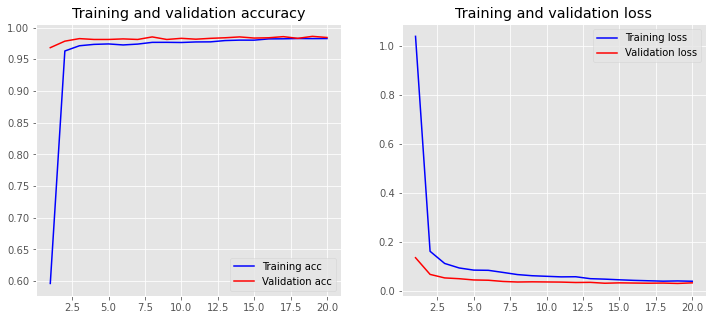

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(ten_fold_history[0])

In [ ]:
ten_fold_data = []
for i in range(0,10):
  ten_fold_acc.append([np.mean(ten_fold_history[i].history['accuracy']),
                       np.mean(ten_fold_history[i].history['val_accuracy']),
                       np.mean(ten_fold_history[i].history['loss']),
                       np.mean(ten_fold_history[i].history['val_loss'])])

In [ ]:
df_acc = pd.DataFrame(ten_fold_acc, columns=['train_acc', 'val_acc', 'train_loss', 'val_loss'])

In [ ]:
df_acc.to_csv('ten_fold_acc_1.csv')
!cp ten_fold_acc_1.csv '/content/drive/My Drive/Dissertation/Experiment 1/Output_csv'

In [ ]:
test_pred = transformer.predict(test_ds, verbose = 1)

7/7 [==============================] - 1s 31ms/step


In [ ]:
char_lookup = dict((v,k) for k,v in char_dict.items())
char_lookup[0] = " "
pred_inflection = []
for word in test_pred:
  character = []
  for letter in word:
    index = np.argmax(letter)
    char = char_lookup[index]
    if char == ">":
      break
    character.append(char)
  inflection = "".join(character)
  pred_inflection.append(inflection)

In [ ]:
df_ed_test

,root,inflection,tag,reg
0,enwind,enwound,V;PST,False
1,conscript,conscripted,V;PST,True
16,stereotype,stereotyped,V;PST,False
19,countervail,countervailed,V;PST,True
22,becue,becued,V;PST,False
...,...,...,...,...
965,rat-race,rat-raced,V;PST,False
967,disaffirm,disaffirmed,V;PST,True
969,cameltoe,cameltoed,V;PST,False
977,blister,blistered,V;PST,True


In [ ]:
for inputs, targets in test_ds:
  print(type(targets))
  print(len(targets))
  print(targets[0])

In [ ]:
pred_inflection.sort()

In [ ]:
original_inflection = list(df_ed_test['inflection'].values)

In [ ]:
original_inflection[0] = 'calvinised'

In [ ]:
original_inflection.sort()

In [ ]:
original_inflection

In [ ]:
pred_inflection

In [ ]:
df_pred = pd.DataFrame(original_inflection, columns = ['test_inflection'])
df_pred['pred_1'] = pred_inflection

In [ ]:
df_pred['Acc'] = np.where(df_pred['test_inflection'] == df_pred['pred_1'], 1,0)

In [ ]:
sum(df_pred['Acc'])/len(df_pred)

0.8603603603603603

In [ ]:
df_pred.to_csv('Prediction_1.csv')
!cp Prediction_1.csv '/content/drive/My Drive/Dissertation/Experiment 1/Output_csv'

#Model 2 Just Past Tense

In [ ]:
checkpoint_path = file_path+'Model_3/checkpoint_past_tense'
checkpoint= ModelCheckpoint(checkpoint_path, monitor = 'val_loss', mode='min', save_best_only = True, verbose = 1)
epochs = 20  
from tensorflow.keras import layers, Sequential, Model, Input, optimizers
adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
transformer.compile(
    optimizer = adam, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history = transformer.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks = checkpoint)

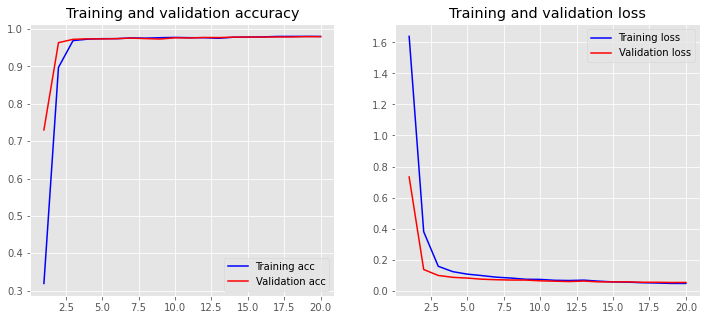

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [ ]:
char_lookup = dict((v,k) for k,v in char_dict.items())
char_lookup[0] = " "
test_pred = transformer.predict(test_ds, verbose=1)
pred_inflection = []
for word in test_pred:
  character = []
  for letter in word:
    index = np.argmax(letter)
    char = char_lookup[index]
    if char == ">":
      break
    character.append(char)
  inflection = "".join(character)
  pred_inflection.append(inflection)

7/7 [==============================] - 1s 26ms/step


In [ ]:
df_ed_test['pred'] = pred_inflection
df_ed_test['Acc'] = np.where(df_ed_test['inflection'] == df_ed_test['pred'], 1,0)

In [ ]:
df_ed_test.groupby(['reg']).Acc.value_counts().unstack()


Acc,0,1
reg,,
Irregular,18,100
Regular,6,98


In [ ]:
sum(df_ed_test['Acc'])/len(df_ed_test)

0.8918918918918919

In [ ]:
df_ed_test.to_csv('Prediction_past_tense.csv')
!cp Prediction_past_tense.csv '/content/drive/My Drive/Dissertation/Experiment 1/Output_csv'

#Model 3 All verbs All Inflections

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint_path = file_path+'Model_3/checkpoint'
checkpoint= ModelCheckpoint(checkpoint_path, monitor = 'val_loss', mode='min', save_best_only = True, verbose = 1)
epochs = 20  # This should be at least 30 for convergence
from tensorflow.keras import layers, Sequential, Model, Input, optimizers
adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
transformer.compile(
    optimizer = adam, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history = transformer.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks = checkpoint)

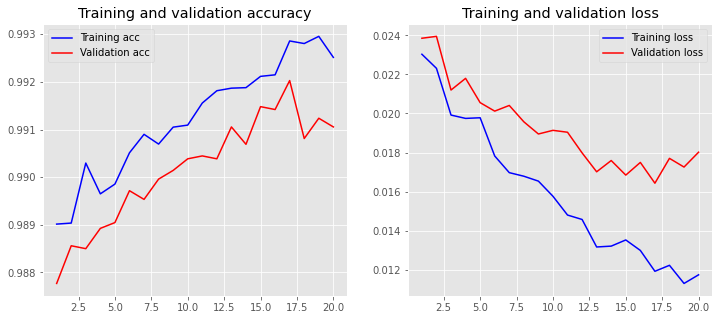

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [ ]:
char_lookup = dict((v,k) for k,v in char_dict.items())
char_lookup[0] = " "
test_pred = transformer.predict(test_ds, verbose=1)
pred_inflection = []
for word in test_pred:
  character = []
  for letter in word:
    index = np.argmax(letter)
    char = char_lookup[index]
    if char == ">":
      break
    character.append(char)
  inflection = "".join(character)
  pred_inflection.append(inflection)

32/32 [==============================] - 1s 25ms/step


In [ ]:
df_test['pred'] = pred_inflection
df_test['Acc'] = np.where(df_test['inflection'] == df_test['pred'], 1,0)

In [ ]:
df_test

,root,inflection,tag,reg,tag_cat,input_tag,pred,Acc
0,enwind,enwound,V;PST,Irregular,2,enwind2,enwuun,0
1,conscript,conscripted,V;PST,Regular,2,conscript2,conscripted,1
2,behallow,behallow,V;NFIN,Regular,1,behallow1,behallow,1
3,inbend,inbent,V;V.PTCP;PST,None,4,inbend4,inbend,0
4,inchant,inchanting,V;V.PTCP;PRS,Regular,3,inchant3,inchanting,1
...,...,...,...,...,...,...,...,...
995,fulmine,fulmine,V;NFIN,Regular,1,fulmine1,fulmine,1
996,foozle,foozles,V;3;SG;PRS,Regular,0,foozle0,foozles,1
997,beseem,beseeming,V;V.PTCP;PRS,Regular,3,beseem3,beseeming,1
998,undumpish,undumpishes,V;3;SG;PRS,Irregular,0,undumpish0,undumpishes,1


In [ ]:
df_test['tag'].values

['V;PST', 'V;PST', 'V;NFIN', 'V;V.PTCP;PST', 'V;V.PTCP;PRS', ..., 'V;NFIN', 'V;3;SG;PRS', 'V;V.PTCP;PRS', 'V;3;SG;PRS', 'V;V.PTCP;PST']
Length: 1000
Categories (5, object): ['V;3;SG;PRS', 'V;NFIN', 'V;PST', 'V;V.PTCP;PRS', 'V;V.PTCP;PST']

In [ ]:
df_test.to_csv('Prediction_all_inflection.csv')
!cp Prediction_all_inflection.csv '/content/drive/My Drive/Dissertation/Experiment 1/Output_csv'

In [ ]:
def tag_acc(tag):
  df0 = df_test[df_test['tag'] == tag]
  all_acc = sum(df0['Acc'])/len(df0)
  df_reg = df0[df0['reg'] == 'Regular']
  reg_per = len(df_reg)/len(df0)
  reg_acc = sum(df_reg['Acc'])/len(df_reg)
  df_irr = df0[df0['reg'] == 'Irregular']
  if len(df_irr) == 0:
    irr_acc = 'Nan'
    irr_per = 0
  else:
    irr_acc = sum(df_irr['Acc'])/len(df_irr)
    irr_per = len(df_irr)/len(df0)
  return [tag, all_acc, reg_acc, irr_acc, "{:.2%}".format(reg_per), "{:.2%}".format(irr_per)]

In [ ]:
acc_list = [tag_acc('V;PST'), tag_acc('V;V.PTCP;PST'), tag_acc('V;V.PTCP;PRS'), tag_acc('V;NFIN'), tag_acc('V;3;SG;PRS')]
df_acc = pd.DataFrame(acc_list, columns = ['Type', 'Total Acc', 'Regular Acc', 'Irregular Acc', 'Test Regular%', 'Test Irregular%'])
df_result = pd.merge(df_acc, df_train_per, on=['Type'])
df_result

,Type,Total Acc,Regular Acc,Irregular Acc,Test Regular%,Test Irregular%,Train Regular,Train Irregular,Train Regular%,Train Irregular%
0,V;PST,0.918919,0.942308,0.898305,46.85%,53.15%,693.0,1002.0,40.88%,59.12%
1,V;V.PTCP;PST,0.827225,0.926829,0.752294,42.93%,57.07%,671.0,1023.0,39.61%,60.39%
2,V;V.PTCP;PRS,0.905941,0.970297,0.841584,50.00%,50.00%,828.0,852.0,49.29%,50.71%
3,V;NFIN,0.977143,0.977143,Nan,100.00%,0.00%,1716.0,0.0,100.00%,0.00%
4,V;3;SG;PRS,0.957143,0.956757,0.96,88.10%,11.90%,1564.0,151.0,91.20%,8.80%


In [ ]:
df_result.to_csv('Model_3_acc.csv')
!cp Model_3_acc.csv output_path

#Model 4 3SG -s


In [ ]:
checkpoint_path = file_path+'Model_3/checkpoint_3sg_s'
checkpoint= ModelCheckpoint(checkpoint_path, monitor = 'val_loss', mode='min', save_best_only = True, verbose = 1)
epochs = 20  
from tensorflow.keras import layers, Sequential, Model, Input, optimizers
adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
transformer.compile(
    optimizer = adam, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history = transformer.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks = checkpoint)

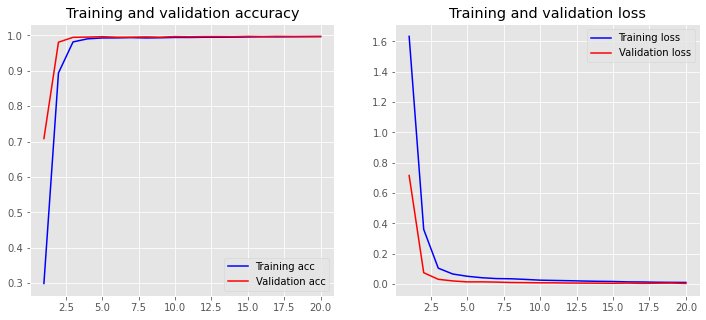

In [ ]:
plot_history(history)

In [ ]:
char_lookup = dict((v,k) for k,v in char_dict.items())
char_lookup[0] = " "
test_pred = transformer.predict(test_ds, verbose=1)
pred_inflection = []
for word in test_pred:
  character = []
  for letter in word:
    index = np.argmax(letter)
    char = char_lookup[index]
    if char == ">":
      break
    character.append(char)
  inflection = "".join(character)
  pred_inflection.append(inflection)

7/7 [==============================] - 0s 23ms/step


In [ ]:
df_s_test['pred'] = pred_inflection
df_s_test['Acc'] = np.where(df_s_test['inflection'] == df_s_test['pred'], 1,0)
df_s_test.groupby(['reg']).Acc.value_counts().unstack()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Acc,0,1
reg,,
Irregular,5,20
Regular,8,177


In [ ]:
df_s_test.to_csv('Prediction_3sg_s.csv')
!cp Prediction_3sg_s.csv '/content/drive/My Drive/Dissertation/Experiment 1/Output_csv'

#Model 5 Pre Progressive -ing


In [ ]:
checkpoint_path = file_path+'Model_3/checkpoint_present_progressive'
checkpoint= ModelCheckpoint(checkpoint_path, monitor = 'val_loss', mode='min', save_best_only = True, verbose = 1)
epochs = 20  
from tensorflow.keras import layers, Sequential, Model, Input, optimizers
adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
transformer.compile(
    optimizer = adam, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history = transformer.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks = checkpoint)

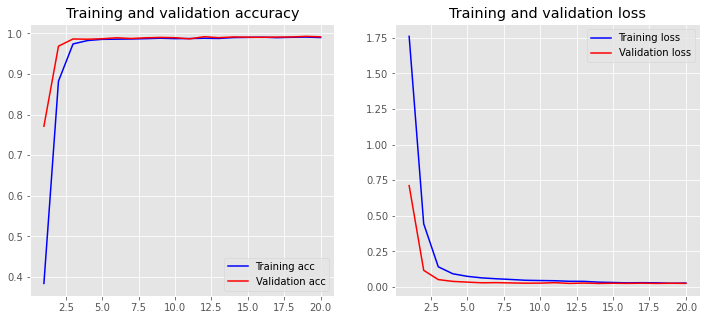

In [ ]:
plot_history(history)

In [ ]:
char_lookup = dict((v,k) for k,v in char_dict.items())
char_lookup[0] = " "
test_pred = transformer.predict(test_ds, verbose=1)
pred_inflection = []
for word in test_pred:
  character = []
  for letter in word:
    index = np.argmax(letter)
    char = char_lookup[index]
    if char == ">":
      break
    character.append(char)
  inflection = "".join(character)
  pred_inflection.append(inflection)

7/7 [==============================] - 1s 21ms/step


In [ ]:
df_ing_test['pred'] = pred_inflection
df_ing_test['Acc'] = np.where(df_ing_test['inflection'] == df_ing_test['pred'], 1,0)
df_ing_test.groupby(['reg']).Acc.value_counts().unstack()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Acc,0,1
reg,,
Irregular,15,86
Regular,3,98


In [ ]:
df_ing_test.to_csv('Prediction_ptcp_prs_ing.csv')
!cp Prediction_ptcp_prs_ing.csv '/content/drive/My Drive/Dissertation/Experiment 1/Output_csv'

#Model 6 Past Participle -en

In [ ]:

epochs = 20  
from tensorflow.keras import layers, Sequential, Model, Input, optimizers
adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
transformer.compile(
    optimizer = adam, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history = transformer.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks = checkpoint)

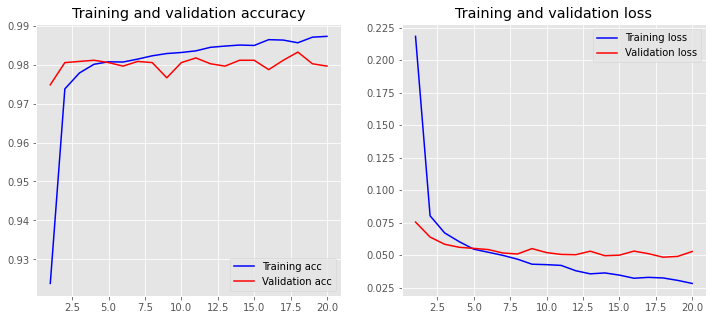

In [ ]:
plot_history(history)

In [ ]:
char_lookup = dict((v,k) for k,v in char_dict.items())
char_lookup[0] = " "
test_pred = transformer.predict(test_ds, verbose=1)
pred_inflection = []
for word in test_pred:
  character = []
  for letter in word:
    index = np.argmax(letter)
    char = char_lookup[index]
    if char == ">":
      break
    character.append(char)
  inflection = "".join(character)
  pred_inflection.append(inflection)

6/6 [==============================] - 0s 24ms/step


In [ ]:
df_en_test['pred'] = pred_inflection
df_en_test['Acc'] = np.where(df_en_test['inflection'] == df_en_test['pred'], 1,0)
df_en_test.groupby(['reg']).Acc.value_counts().unstack()


In [ ]:
df_en_test.to_csv('Prediction_ptcp_pst_en.csv')
!cp Prediction_ptcp_pst_en.csv '/content/drive/My Drive/Dissertation/Experiment 1/Output_csv'

#Model 7 Finite

In [ ]:
epochs = 20  
from tensorflow.keras import layers, Sequential, Model, Input, optimizers
adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
transformer.compile(
    optimizer = adam, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history = transformer.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks = checkpoint)

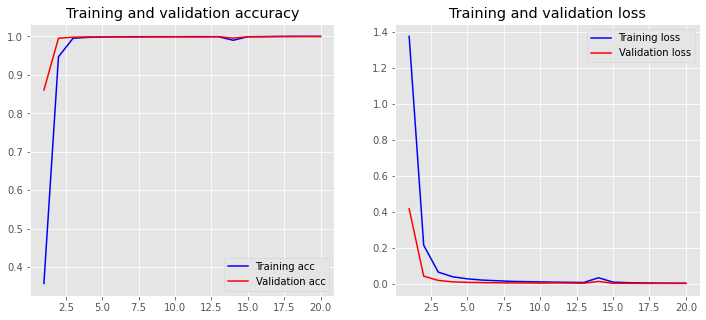

In [ ]:
plot_history(history)

In [ ]:
char_lookup = dict((v,k) for k,v in char_dict.items())
char_lookup[0] = " "
test_pred = transformer.predict(test_ds, verbose=1)
pred_inflection = []
for word in test_pred:
  character = []
  for letter in word:
    index = np.argmax(letter)
    char = char_lookup[index]
    if char == ">":
      break
    character.append(char)
  inflection = "".join(character)
  pred_inflection.append(inflection)

6/6 [==============================] - 1s 23ms/step


In [ ]:
df_fin_test['pred'] = pred_inflection
df_fin_test['Acc'] = np.where(df_fin_test['inflection'] == df_fin_test['pred'], 1,0)
df_fin_test.to_csv('Prediction_fin.csv')
!cp Prediction_fin.csv '/content/drive/My Drive/Dissertation/Experiment 1/Output_csv'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#Compare 

In [ ]:
df_result

,Type,Total Acc,Regular Acc,Irregular Acc,Test Regular%,Test Irregular%,Train Regular,Train Irregular,Train Regular%,Train Irregular%
0,V;PST,0.918919,0.942308,0.898305,46.85%,53.15%,693.0,1002.0,40.88%,59.12%
1,V;V.PTCP;PST,0.827225,0.926829,0.752294,42.93%,57.07%,671.0,1023.0,39.61%,60.39%
2,V;V.PTCP;PRS,0.905941,0.970297,0.841584,50.00%,50.00%,828.0,852.0,49.29%,50.71%
3,V;NFIN,0.977143,0.977143,Nan,100.00%,0.00%,1716.0,0.0,100.00%,0.00%
4,V;3;SG;PRS,0.957143,0.956757,0.96,88.10%,11.90%,1564.0,151.0,91.20%,8.80%


In [ ]:
def tag_acc_each(dff, tag):
  all_acc = sum(dff['Acc'])/len(dff)
  df_reg = dff[dff['reg'] == 'Regular']
  reg_acc = sum(df_reg['Acc'])/len(df_reg)
  df_irr = dff[dff['reg'] == 'Irregular']
  if len(df_irr) == 0:
    irr_acc = 'Nan'
  else:
    irr_acc = sum(df_irr['Acc'])/len(df_irr)
  return [tag, all_acc, reg_acc, irr_acc]

In [ ]:
tag_acc_each_list = [tag_acc_each(df_ed_test, 'V;PST'),
                     tag_acc_each(df_en_test, 'V;V.PTCP;PST'),
                     tag_acc_each(df_ing_test, 'V;V.PTCP;PRS'),
                     tag_acc_each(df_fin_test, 'V;NFIN'),
                     tag_acc_each(df_s_test, 'V;3;SG;PRS'),]

In [ ]:
df_each = pd.DataFrame(tag_acc_each_list, columns = ['Type', 'Each Acc', 'Each Regular Acc', 'Each Irregular Acc'])
df_all_results = pd.merge(df_result, df_each, on = 'Type')

,Type,Total Acc,Regular Acc,Irregular Acc,Test Regular%,Test Irregular%,Train Regular,Train Irregular,Train Regular%,Train Irregular%,Each Acc,Each Regular Acc,Each Irregular Acc
0,V;PST,0.918919,0.942308,0.898305,46.85%,53.15%,693.0,1002.0,40.88%,59.12%,0.918919,0.942308,0.898305
1,V;V.PTCP;PST,0.827225,0.926829,0.752294,42.93%,57.07%,671.0,1023.0,39.61%,60.39%,0.837696,0.914634,0.779817
2,V;V.PTCP;PRS,0.905941,0.970297,0.841584,50.00%,50.00%,828.0,852.0,49.29%,50.71%,0.905941,0.970297,0.841584
3,V;NFIN,0.977143,0.977143,Nan,100.00%,0.00%,1716.0,0.0,100.00%,0.00%,0.965714,0.965714,Nan
4,V;3;SG;PRS,0.957143,0.956757,0.96,88.10%,11.90%,1564.0,151.0,91.20%,8.80%,0.957143,0.956757,0.96


In [ ]:
df_all_results = pd.merge(df_result, df_each, on = 'Type')
df_all_results.to_csv('Model_Compare_Result.csv')
!cp Model_Compare_Result.csv '/content/drive/My Drive/Dissertation/Experiment 1/Output_csv'

In [ ]:
df_test

,root,inflection,tag,reg,tag_cat,input_tag,pred,Acc
0,enwind,enwound,V;PST,Irregular,2,enwind2,enwuun,0
1,conscript,conscripted,V;PST,Regular,2,conscript2,conscripted,1
2,behallow,behallow,V;NFIN,Regular,1,behallow1,behallow,1
3,inbend,inbent,V;V.PTCP;PST,Irregular,4,inbend4,inbend,0
4,inchant,inchanting,V;V.PTCP;PRS,Regular,3,inchant3,inchanting,1
...,...,...,...,...,...,...,...,...
995,fulmine,fulmine,V;NFIN,Regular,1,fulmine1,fulmine,1
996,foozle,foozles,V;3;SG;PRS,Regular,0,foozle0,foozles,1
997,beseem,beseeming,V;V.PTCP;PRS,Regular,3,beseem3,beseeming,1
998,undumpish,undumpishes,V;3;SG;PRS,Irregular,0,undumpish0,undumpishes,1


In [ ]:
df_test.reset_index(inplace=True)
df_test = df_test.rename(columns = {'index':'Index'})
df_test

,Index,root,inflection,tag,reg,tag_cat,input_tag,pred,Acc
0,0,enwind,enwound,V;PST,Irregular,2,enwind2,enwuun,0
1,1,conscript,conscripted,V;PST,Regular,2,conscript2,conscripted,1
2,2,behallow,behallow,V;NFIN,Regular,1,behallow1,behallow,1
3,3,inbend,inbent,V;V.PTCP;PST,Irregular,4,inbend4,inbend,0
4,4,inchant,inchanting,V;V.PTCP;PRS,Regular,3,inchant3,inchanting,1
...,...,...,...,...,...,...,...,...,...
995,995,fulmine,fulmine,V;NFIN,Regular,1,fulmine1,fulmine,1
996,996,foozle,foozles,V;3;SG;PRS,Regular,0,foozle0,foozles,1
997,997,beseem,beseeming,V;V.PTCP;PRS,Regular,3,beseem3,beseeming,1
998,998,undumpish,undumpishes,V;3;SG;PRS,Irregular,0,undumpish0,undumpishes,1


In [ ]:
df_test.head()

,Index,root,inflection,tag,reg,tag_cat,input_tag,pred,Acc
0,0,enwind,enwound,V;PST,Irregular,2,enwind2,enwuun,0
1,1,conscript,conscripted,V;PST,Regular,2,conscript2,conscripted,1
2,2,behallow,behallow,V;NFIN,Regular,1,behallow1,behallow,1
3,3,inbend,inbent,V;V.PTCP;PST,Irregular,4,inbend4,inbend,0
4,4,inchant,inchanting,V;V.PTCP;PRS,Regular,3,inchant3,inchanting,1


In [ ]:
df_test.columns

Index(['Index', 'root', 'inflection', 'tag', 'reg', 'tag_cat', 'input_tag',
       'pred', 'Acc'],
      dtype='object')

In [ ]:
df_each_test.columns

Index(['Index', 'root', 'inflection', 'tag', 'reg', 'tag_cat', 'input_tag',
       'Each_pred', 'Each_Acc'],
      dtype='object')

In [ ]:
def indexcol (dff):
  dff.reset_index(inplace=True)
  dff = dff.rename(columns = {'index':'Index'})
  return dff
df_ed_test = indexcol(df_ed_test)
df_ing_test = indexcol(df_ing_test)
df_s_test = indexcol(df_s_test)
df_fin_test = indexcol(df_fin_test)

In [ ]:
df_en_test = pd.read_csv('/content/drive/My Drive/Dissertation/Experiment 1/Output_csv/Prediction_ptcp_pst_en.csv')

In [ ]:
df_each_test = pd.concat([df_en_test, df_ing_test, df_s_test, df_fin_test, df_ed_test]).sort_values(by='Index')

In [ ]:
df_each_test=df_each_test.rename(columns = {'pred':'Each_pred','Acc':'Each_Acc'})

In [ ]:
df_each_test.head()

,Index,root,inflection,tag,reg,tag_cat,input_tag,Each_pred,Each_Acc
0,0,enwind,enwound,V;PST,Irregular,2,enwind2,enwuun,0
1,1,conscript,conscripted,V;PST,Regular,2,conscript2,conscripted,1
0,2,behallow,behallow,V;NFIN,Regular,1,behallow1,behallow,1
0,3,inbend,inbent,V;V.PTCP;PST,Irregular,4,inbend4,inbende ededddddeedd,0
0,4,inchant,inchanting,V;V.PTCP;PRS,Regular,3,inchant3,inchanting,1


In [ ]:
df_compare.head()

,Index,root,inflection,tag,reg,tag_cat,input_tag,pred,Acc,Each_pred,Each_Acc,Compare
0,0,enwind,enwound,V;PST,Irregular,2,enwind2,enwuun,0,enwuun,0,Same
1,1,conscript,conscripted,V;PST,Regular,2,conscript2,conscripted,1,conscripted,1,Same
2,2,behallow,behallow,V;NFIN,Regular,1,behallow1,behallow,1,behallow,1,Same
3,3,inbend,inbent,V;V.PTCP;PST,Irregular,4,inbend4,inbend,0,inbende ededddddeedd,0,Not Same
4,4,inchant,inchanting,V;V.PTCP;PRS,Regular,3,inchant3,inchanting,1,inchanting,1,Same


In [ ]:
df_compare = pd.merge(df_test, df_each_test[['Index','Each_pred', 'Each_Acc']], on= 'Index')

In [ ]:
df_compare['Compare'] = np.where(df_compare['pred'] == df_compare['Each_pred'], 'Same','Not Same')


In [ ]:
output_path

'/content/drive/My Drive/Dissertation/Experiment 1/Output_csv'

In [ ]:
df_compare.to_csv('Prediction_Compare_Results_All.csv')
!cp 'Prediction_Compare_Results_All.csv' '/content/drive/My Drive/Dissertation/Experiment 1/Output_csv'